In [2]:
# This notebook will use data on heart disease from https://www.kaggle.com/ronitf/heart-disease-uci
# to make a neural network to predict whether a patient has heart disease

In [3]:
# first we will import packages

In [4]:
import tensorflow as tf
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.python.framework import ops
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa
from sklearn import preprocessing

In [5]:
plt.close('all')

In [6]:
dir_path = os.path.dirname(os.path.realpath("__file__"))
file_name = dir_path + "/heart.csv"

In [7]:
# make numpy values easier to read
np.set_printoptions(precision=3, suppress=True)

In [8]:
df = pd.read_csv(file_name)

In [9]:
# The raw data is as follows:

In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
'''
The attributes represented here are:
    1. age (in years)
    2. sex (0=female, 1=male)
    3. cp. Chest pain type (0=asymptomatic, 1=atypical angina, 2=pain without relation to angina, 3=typical angina)
    4. trestbps. Resting blood pressure (mm Hg)
    5. chol. Serum cholestoral (mg/dl)
    6. restecg. Electrocardiogram at rest (0=probable left ventricular hypertrophy, 1=normal, 2=abnormalities in the T wave or ST segment)
    7. fbs. Blood sugar level > 120mg/dl (0=no, 1=yes)
    8. thalach. Maximum heart rate achieved
    9. exang. Exercise induced angina(0=no, 1=yes)
    10. oldpeak = ST depression induced by exercise relative to rest
    11. slope = the slope of the peak exercise ST segment (0=descending, 1=flat, 2=ascending)
    12.number of major vessels coloured by dye (0-4)
    13.thal. Blood flow observed by dye. (0=null, 1=normal, 2=fixed defect, 3=reversable defect)
    14. target (0=does not have heart disease, 1=has heart disease)
'''

'\nThe attributes represented here are:\n    1. age (in years)\n    2. sex (0=female, 1=male)\n    3. cp. Chest pain type (0=asymptomatic, 1=atypical angina, 2=pain without relation to angina, 3=typical angina)\n    4. trestbps. Resting blood pressure (mm Hg)\n    5. chol. Serum cholestoral (mg/dl)\n    6. restecg. Electrocardiogram at rest (0=probable left ventricular hypertrophy, 1=normal, 2=abnormalities in the T wave or ST segment)\n    7. fbs. Blood sugar level > 120mg/dl (0=no, 1=yes)\n    8. thalach. Maximum heart rate achieved\n    9. exang. Exercise induced angina(0=no, 1=yes)\n    10. oldpeak = ST depression induced by exercise relative to rest\n    11. slope = the slope of the peak exercise ST segment (0=descending, 1=flat, 2=ascending)\n    12.number of major vessels coloured by dye (0-4)\n    13.thal. Blood flow observed by dye. (0=null, 1=normal, 2=fixed defect, 3=reversable defect)\n    14. target (0=does not have heart disease, 1=has heart disease)\n'

In [12]:
plt.figure();

<Figure size 432x288 with 0 Axes>

In [13]:
# FUNCTIONS FOR DATA VISUALISATION

In [14]:
'''
plot_bar_range will plot a bar chart for non binary data
Inputs:
    category = name of column
    minimum = smallest value on x axis
    maximum = largest value on x axis
    category_range = the range of values represented by each bar
'''

'\nplot_bar_range will plot a bar chart for not binary data\nInputs:\n    category = name of column\n    minimum = smallest value on x axis\n    maximum = largest value on x axis\n    category_range = the range of values represented by each bar\n'

In [15]:
def plot_bar_range(category,minimum, maximum, category_range):
    number_of_labels = int((maximum - minimum) / category_range)
    # initiate the labels and values
    labels = []
    values = []
    # for each age range add the count to the values array
    for x in range(number_of_labels):
        start = minimum + x * category_range
        end = start + category_range
        labels.append(str(start) + "-" + str(end))
        range_value = df[category].between(start, end, inclusive = True).value_counts().sort_index()
        # if there is a true value there will age range values will be length 2
        # value[0] is false and value[1] = true
        # if not length 2 then there are no true values so value is 0
        if (len(range_value.values) == 2):
            values.append(range_value.values[1])
        else:
            values.append(0)
    # create a data frame
    data = pd.DataFrame({category:labels, 'val':values})
    # plot the bar chart
    data.plot.bar(x=category, y='val', rot=0)
    plt.xticks(rotation=90)

In [16]:
'''
plot_bar will plot a bar chart for binary data
Inputs:
    category = name of column
'''

'\nplot_bar will plot a bar chart for binary data\nInputs:\n    category = name of column\n'

In [17]:
def plot_bar(category):
     # initiate the labels and values
    labels = []
    values = []
    # get counts of each value
    value_counts = df[category].value_counts().sort_index()
    value_index = value_counts.index.tolist()
    value = value_counts.values
    # for every entry add the key and value
    for i in range (len(value)):
        labels.append(value_index[i])
        values.append(value[i])
    # create a data frame
    data = pd.DataFrame({category:labels, 'val':values})
    # plot the bar chart
    data.plot.bar(x=category, y='val', rot=0)
    plt.xticks(rotation='horizontal')

In [18]:
'''
plot_pie_range will plot a pie chart for non binary data
Inputs:
    category = name of column
    minimum = smallest value on x axis
    maximum = largest value on x axis
    category_range = the range of values represented by each bar
'''

'\nplot_pie_range will plot a pie chart for not binary data\nInputs:\n    category = name of column\n    minimum = smallest value on x axis\n    maximum = largest value on x axis\n    category_range = the range of values represented by each bar\n'

In [19]:
def plot_pie_range(category,minimum, maximum, category_range):
    number_of_labels = int((maximum - minimum) / category_range)
    # initiate the labels and values
    labels = []
    values = []
    # for each age range add the count to the values array
    for x in range(number_of_labels):
        start = minimum + x * category_range
        end = start + category_range
        labels.append(str(start) + "-" + str(end))
        range_value = df[category].between(start, end, inclusive = True).value_counts().sort_index()
        # if there is a true value there will age range values will be length 2
        # value[0] is false and value[1] = true
        # if not length 2 then there are no true values so value is 0
        if (len(range_value.values) == 2):
            values.append(range_value.values[1])
        else:
            values.append(0)
    # create a data frame
    data = pd.Series(values,index = labels, name=category)
    # plot the pie chart
    data.plot.pie(subplots=True, figsize=(8, 4))

In [20]:
'''
plot_pie will plot a pie chart for binary data
Inputs:
    category = name of column
'''

'\nplot_pie will plot a pie chart for not binary data\nInputs:\n    category = name of column\n'

In [21]:
def plot_pie(category):
     # initiate the labels and values
    labels = []
    values = []
    # get counts of each value
    value_counts = df[category].value_counts().sort_index()
    value_index = value_counts.index.tolist()
    value = value_counts.values
    # for every entry add the key and value
    for i in range (len(value)):
        labels.append(value_index[i])
        values.append(value[i])
    # create a data frame
    data = pd.Series(values, index=labels, name=category)
    # plot the pie chart
    data.plot.pie(subplots=True, figsize=(8, 4))

In [22]:
# IMPLEMENTATION OF DATA VISUALISATION

In [23]:
# Gender of the patients. 0: female, 1: male

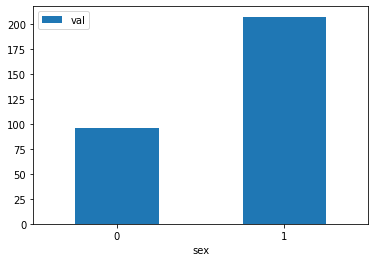

In [24]:
plot_bar('sex')

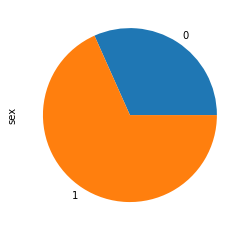

In [25]:
plot_pie('sex')

In [26]:
# age of the patients

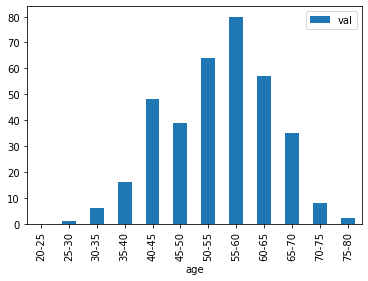

In [27]:
plot_bar_range('age',20, 80, 5)

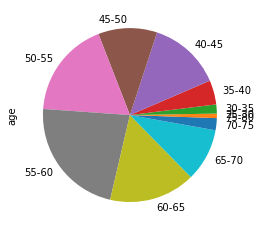

In [28]:
plot_pie_range('age',20, 80, 5)

In [29]:
# Chest pain. 0: asymptomatic, 1: atypical angina, 2: pain without relation to angina, 3: typical angina

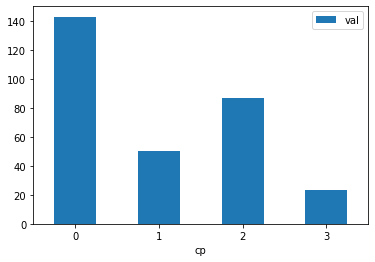

In [30]:
plot_bar('cp')

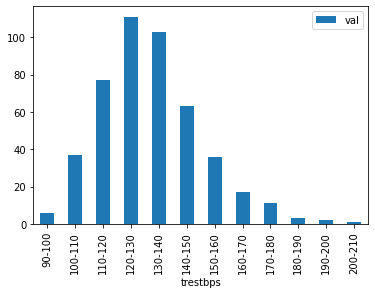

In [31]:
plot_bar_range('trestbps',90, 210, 10)

In [32]:
# Cholesterol level in mg/dl

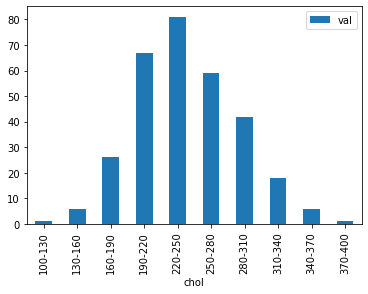

In [33]:
plot_bar_range('chol',100, 400, 30)

In [34]:
# Blood sugar level > 120 mg/dl. 0: no, 1: yes

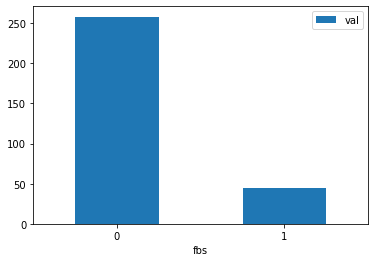

In [35]:
plot_bar('fbs')

In [36]:
# Electrocardiogram at rest. 0: probable left ventricular hypertrophy, 1: normal, 2: abnormalities in the T wave or ST segment

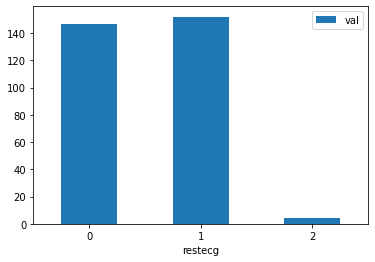

In [37]:
plot_bar('restecg')

In [38]:
# Maxium heart rate

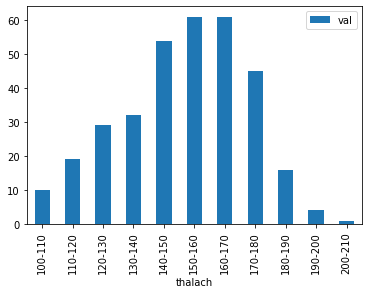

In [39]:
plot_bar_range('thalach',100, 210, 10)

In [40]:
# Angina during exercise. 0: no, 1: yes

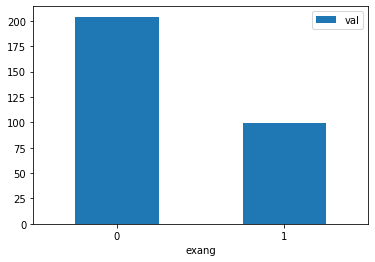

In [41]:
plot_bar('exang')

In [42]:
# ST depression induced by exercise relative to rest

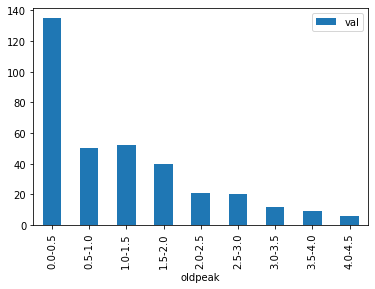

In [43]:
plot_bar_range('oldpeak',0, 4.5, 0.5)

In [44]:
# Slope of the peak exercise ST segment. 0:descending, 1:flat, 2:ascending

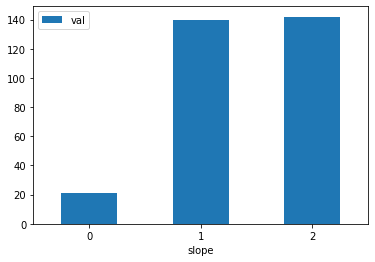

In [45]:
plot_bar('slope')

In [46]:
# Number of major vessels coloured by dye (0-4)

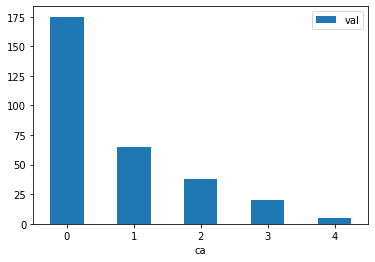

In [47]:
plot_bar('ca')

In [48]:
# Blood flow observed by dye. 0: null, 1: normal, 2: fixed defect, 3: reversable defect 

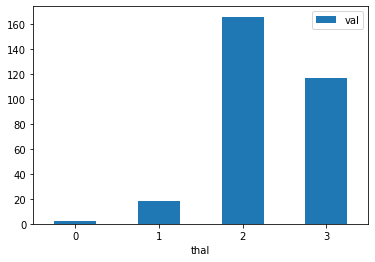

In [49]:
plot_bar('thal')

In [50]:
# Patient has heart disease. 0: no, 1: yes

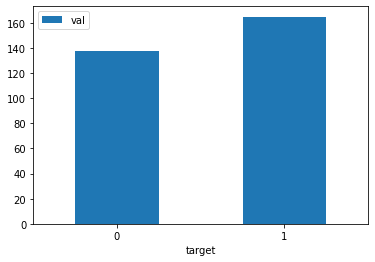

In [51]:
plot_bar('target')

In [52]:
# FUNCTIONS FOR TENSORFLOW

In [53]:
# one_hot_matrix implements one hot encoding for a specific column

In [54]:
def one_hot_matrix(labels, C):
    """
    Creates a matrix where the i-th row corresponds to the ith class number and the jth column
                     corresponds to the jth training example. So if example j had a label i. Then entry (i,j) 
                     will be 1. 
    Arguments:
    labels -- vector containing the labels 
    C -- number of classes, the depth of the one hot dimension
    
    Returns: 
    one_hot -- one hot matrix
    """
    # Create a tf.constant equal to C (depth)
    C = tf.constant(C, name = "C")
    # Use tf.one_hot, be careful with the axis
    one_hot_matrix = tf.one_hot(indices = labels, depth = C, axis = 0)
    return one_hot_matrix

In [55]:
# add_one_hot_matrix_columns implements one hot encoding for a array of columns and updates the data

In [56]:
def add_one_hot_matrix_columns(data, columns):
    for column in columns:
        unique_values = data[column].nunique()
        one_hot = one_hot_matrix(data[column], unique_values)
        data = data.drop(columns=column)
        for i in range(unique_values):
            new_column = str(column) + "_" + str(i)
            data[new_column] = one_hot[i]
    return data 

In [57]:
'''
forward_propagation creates the neural network model.
There are 4 layers and the structure is:
    LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
Xavier initialisation is used in linear layers for weights. Bias is initialised as zero
Inputs:
    layer1_units: depth of 1st layer
    layer2_units: depth of 2nd layer
    layer3_units: depth of 3rd layer
    layer4_units: depth of 4th layer
''' 

'\nforward_propagation creates the neural network model.\nThere are 4 layers and the structure is:\n    LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID\nXavier initialisation is used in linear layers for weights. Bias is initialised as zero\nInputs:\n    layer1_units: depth of 1st layer\n    layer2_units: depth of 2nd layer\n    layer3_units: depth of 3rd layer\n    layer4_units: depth of 4th layer\n'

In [58]:
def forward_propagation(layer1_units, layer2_units, layer3_units, layer4_units):   
    glorot = tf.keras.initializers.GlorotNormal(seed=1)
    model = tf.keras.Sequential([
        layers.Dense(layer1_units, kernel_initializer=glorot, bias_initializer='zeros'),
        layers.Dense(layer1_units,activation='relu'),
        layers.Dense(layer2_units,kernel_initializer=glorot, bias_initializer='zeros'),
        layers.Dense(layer2_units, activation='relu'),
        layers.Dense(layer3_units, kernel_initializer=glorot, bias_initializer='zeros'),
        layers.Dense(layer3_units, activation='relu'),
        layers.Dense(layer4_units, kernel_initializer=glorot, bias_initializer='zeros'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

In [59]:
# initialize_data splits the data into training, dev and test sets

In [60]:
def initialize_data(X, y):
    X_train, X_dev_test, y_train, y_dev_test = train_test_split(X, y, test_size=0.2, random_state=1)
    X_test, X_dev, y_test, y_dev = train_test_split(X_dev_test, y_dev_test, test_size=0.5, random_state=1)
    y_train = y_train.values.reshape(y_train.shape[0],1)
    y_test = y_test.values.reshape(y_test.shape[0],1)
    y_dev = y_dev.values.reshape(y_dev.shape[0],1)
    X_train = X_train.to_numpy()
    X_test = X_test.to_numpy()
    X_dev = X_dev.to_numpy()
    return X_train, X_dev, X_test, y_train, y_dev, y_test

In [61]:
# normalize_data executes (x - mean) / standard deviation

In [62]:
def normalize_data(data):
    mean = np.mean(data)
    std = np.std(data)
    return (data - mean) / std

In [63]:
# plot_loss creates a graph of the cost function against number of iterations

In [64]:
def plot_loss(losses, training_rate):
    plt.plot(np.squeeze(losses.history['loss']))
    plt.ylabel('cost')
    plt.xlabel('iterations')
    plt.title("Learning rate =" + str(training_rate))
    plt.ylim(ymin=0.4) 
    plt.ylim(ymax=0.7)
    plt.show()

In [65]:
# evaluate_model evaluates success of model and prints predictions and actual values from the test set

In [66]:
def evaluate_model(model, X_test, y_test):
    results = model.evaluate(X_test, y_test)
    print('test loss, test acc:', results)
    amount_to_display = 30
    predictions = model.predict(X_test[:amount_to_display])
    for i in range(amount_to_display):
        print("Prediction: " + str(predictions[i]) + ". Actual: " + str(y_test[:amount_to_display][i]))

In [67]:
'''
create_ model creates the model
initialises the data and creates the model
includes learning rate decay and adam optimsation
plots the loss and evaluates the model
'''

'\ncreate_ model creates the model\ninitialises the data and creates the model\nincludes learning rate decay and adam optimsation\nplots the loss and evaluates the model\n'

In [68]:
def create_model(X, y, layer1_units, layer2_units, layer3_units, layer4_units, epochs, training_rate, decay_rate, metric):
    X_train, X_dev, X_test, y_train, y_dev, y_test = initialize_data(X, y)
    model = forward_propagation(layer1_units,layer2_units, layer3_units, layer4_units)
    global_step = tf.Variable(0, trainable=False)
    learning_rate = tf.compat.v1.train.exponential_decay(training_rate, global_step, epochs, decay_rate, staircase=True)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss=tf.nn.sigmoid_cross_entropy_with_logits,
              metrics=[metric])
    losses = model.fit(X_train, y_train,
                    epochs=epochs,
                    validation_data=(X_dev, y_dev))
    plot_loss(losses, training_rate)
    evaluate_model(model, X_test, y_test)
    return model

In [69]:
# IMPLEMENTING NEURAL NETWORK

In [70]:
# create a train dev test split

In [71]:
X = df.drop(columns="target")
y = df['target']

In [72]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [73]:
X_norm = X.copy()

In [74]:
# normalise the data

In [75]:
X_norm['age'] = normalize_data(X_norm['age'])
X_norm['trestbps'] = normalize_data(X_norm['trestbps'])
X_norm['chol'] = normalize_data(X_norm['chol'])
X_norm['thalach'] = normalize_data(X_norm['thalach'])
X_norm['oldpeak'] = normalize_data(X_norm['oldpeak'])

In [76]:
# use one hot encoding

In [77]:
columns = ['cp', 'slope', 'restecg', 'ca', 'thal']
X_one_hot = add_one_hot_matrix_columns(X, columns)
X_norm_one_hot = add_one_hot_matrix_columns(X_norm, columns)

In [78]:
X_norm_one_hot

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_0,cp_1,...,restecg_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,1,0.763956,-0.256334,1,0.015443,0,1.087338,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-1.915313,1,-0.092738,0.072199,0,1.633471,0,2.122573,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-1.474158,0,-0.092738,-0.816773,0,0.977514,0,0.310912,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.180175,1,-0.663867,-0.198357,0,1.239897,0,-0.206705,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.290464,0,-0.663867,2.082050,0,0.583939,1,-0.379244,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0,0.478391,-0.101730,0,-1.165281,1,-0.724323,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
299,-1.033002,1,-1.234996,0.342756,0,-0.771706,0,0.138373,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
300,1.503641,1,0.706843,-1.029353,1,-0.378132,0,2.036303,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
301,0.290464,1,-0.092738,-2.227533,0,-1.515125,1,0.138373,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [79]:
# create the model

Epoch 1/100
8/8 [==============================] - 0s 46ms/step - loss: 0.6931 - accuracy: 0.4463 - val_loss: 0.7243 - val_accuracy: 0.5161
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6872 - accuracy: 0.4463 - val_loss: 0.7171 - val_accuracy: 0.5161
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6794 - accuracy: 0.4463 - val_loss: 0.7067 - val_accuracy: 0.5161
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6685 - accuracy: 0.4463 - val_loss: 0.6930 - val_accuracy: 0.5161
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6553 - accuracy: 0.4463 - val_loss: 0.6781 - val_accuracy: 0.5161
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6412 - accuracy: 0.4463 - val_loss: 0.6672 - val_accuracy: 0.5161
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6314 - accuracy: 0.4463 - val_loss: 0.6609 - val_accuracy: 0.5161
Epoch 8/100
8/8 [=========

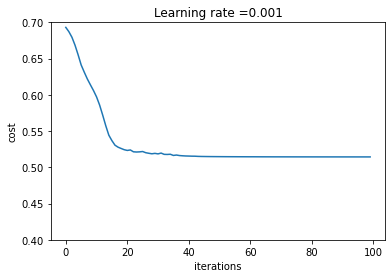

1/1 [==============================] - 0s 1ms/step - loss: 0.5754 - accuracy: 0.8667
test loss, test acc: [0.5753515362739563, 0.8666666746139526]
Prediction: [1.]. Actual: [1]
Prediction: [1.]. Actual: [1]
Prediction: [1.]. Actual: [1]
Prediction: [0.999]. Actual: [1]
Prediction: [1.]. Actual: [1]
Prediction: [0.]. Actual: [0]
Prediction: [0.]. Actual: [0]
Prediction: [1.]. Actual: [1]
Prediction: [1.]. Actual: [1]
Prediction: [1.]. Actual: [1]
Prediction: [1.]. Actual: [0]
Prediction: [0.94]. Actual: [1]
Prediction: [0.834]. Actual: [1]
Prediction: [1.]. Actual: [1]
Prediction: [1.]. Actual: [1]
Prediction: [0.]. Actual: [0]
Prediction: [1.]. Actual: [0]
Prediction: [1.]. Actual: [1]
Prediction: [0.]. Actual: [0]
Prediction: [1.]. Actual: [1]
Prediction: [1.]. Actual: [1]
Prediction: [0.]. Actual: [0]
Prediction: [0.999]. Actual: [0]
Prediction: [0.]. Actual: [0]
Prediction: [0.]. Actual: [0]
Prediction: [1.]. Actual: [1]
Prediction: [0.]. Actual: [0]
Prediction: [1.]. Actual: [0]
Pr

In [80]:
model = create_model(X_norm_one_hot, y, layer1_units=27, layer2_units=13 , layer3_units=6, layer4_units=3, epochs=100, training_rate=0.001, decay_rate=0.96, metric='accuracy')

In [81]:
# RESULTS

In [82]:
'''
The model created was successful in predicting whether a patient had heart disease in 87% of cases.

However we can see that accuracy was 94% on dev set. As the results have reduced on the test set there is likely bias here.

More tuning of parameters could be done here but I suspect bias may be difficult to avoid due to the small number amount of data (303 observations)
'''

'\nThe model created was successful in predicting whether a patient had heart disease in 87% of cases.\n\nHowever we can see that accuracy was 94% on dev set. As the results have reduced on the test set there is likely bias here.\n\nMore tuning of parameters could be done here but I suspect bias may be difficult to avoid due to the small number amount of data (303 observations)\n'